Hani Zaki-20176047<br>
Xavier Laperriere-20157146<br>
Vennila Sooben-20235256<br>
Hazan Gabriel-20198680<br>

### Introduction

Dans le cadre de notre travail final pour le cours IFT3700 A2023, notre équipe a entrepris la tâche de collecter, nettoyer et analyser des données numériques et catégoriques relatives à divers pays du monde. Ces données ont été extraites de 40 tableaux provenant de sources fiables sur Wikipédia (disponible dans l'énoncé du TP). Notre objectif était de nettoyer ces données en éliminant ou regroupant les pays problématiques pour la première partie de ce devoir.

Voici le code utilisé avec des explications. 
Vous pouvez cliquez sur le bouton Run All et un fichier sera généré.

Veuillez notez que quelques de nos fonctions prennent plus de 10s à éxécuter notamment le script permettant d'extraire les données de Wikipedia et le merge de toutes nos colonnes une fois le nettoyage de la partie 1 complété.

In [21]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as pl

In [22]:
def convert_to_float(s):
    if isinstance(s, str):
        s = re.sub(r'[^\x00-\x7F]+', '-', s)
        try:
            return float(s)
        except ValueError:
            return s
    else:
        return s

In [23]:
def replace_text_with_nan(value):
    if isinstance(value, str):
        return np.nan
    else:
        return value

In [24]:
def check_disjoint_rows(data, col):
    count_nan = data[col].isna().sum()
    if count_nan == len(data)-1:
        return True
    else:
        return False

In [25]:
def handle_percentage_range(value):
    if isinstance(value,str) and '-' in value:
        parts = value.split('-')
        try:
            return (float(parts[0]) + float(parts[1])) / 2
        except ValueError:
            return value
    else:
        return value  

In [26]:
def handle_backslash_value(value):
    if isinstance(value,str) and '/' in value:
        parts = value.split('/')
        median_elements = []
        median_elements.append(parts[0])
        median = 0
        for p in parts:
            if isinstance(p,str) and "-" in p:
                n = p.split("-") 
                median_elements.append(n[1])
        try:
            if(len(median_elements)>1):
                return (float(median_elements[0]) + float(median_elements[1]))/2
            else:
                return float(median_elements[0])
        except ValueError:
            return value
    else:
        return value  

In [27]:
def extract_urls(file_path):
    urls = []

    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')
        for link in soup.find_all('a'):
            url = link.get('href')
            if url:
                clean_url = url.replace('https://www.google.com/url?q=', '')
                clean_url = clean_url.split('&')[0]
                urls.append(clean_url)
    return urls[2:]

In [28]:
url_tp="https://github.com/mildshield14/ift3700/blob/main/IFT3700A2023Travail.html"
file_path = 'links.html'

response = requests.get(url_tp)
with open(file_path, 'wb') as f:
    f.write(response.content)
f.close()

found_urls = extract_urls(file_path)

for url in range(len(found_urls)):
    found_urls[url]=found_urls[url].replace('\\"',"")
    print(found_urls[url])

https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita
https://en.wikipedia.org/wiki/List_of_countries_by_Internet_connection_speeds
https://en.wikipedia.org/wiki/List_of_countries_by_alcohol_consumption_per_capita
https://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate
https://en.wikipedia.org/wiki/List_of_countries_by_military_expenditures
https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index
https://en.wikipedia.org/wiki/Democracy_Index
https://en.wikipedia.org/wiki/List_of_countries_by_tertiary_education_attainment
https://en.wikipedia.org/wiki/Importance_of_religion_by_country
https://en.wikipedia.org/wiki/Christianity_by_country
https://en.wikipedia.org/wiki/Islam_by_country
https://en.wikipedia.org/wiki/Buddhism_by_country
https://en.wikipedia.org/wiki/Jewish_population_by_country
https://en.wikipedia.org/wiki/List_of_countries_by_infant_and_under-five_mortality_rates
https://en.wikipedia.org/wiki/Age_of_criminal_res

On modifie manuellement un lien puisqu'il est mal lu par notre fonction.

In [29]:
found_urls[33] = "https://en.wikipedia.org/wiki/List_of_countries_by_spending_on_education_as_percentage_of_GDP"

In [30]:
def scrape_wikipedia_table(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    tables = soup.findAll('table', {'class': 'wikitable'})    
    
    all_tables=[]
    for table in tables:
        df=pd.read_html(str(table))
        df=(df[0])
        all_tables.append(df)
    
    return all_tables
dataframes = []
for url in found_urls:
    df = scrape_wikipedia_table(url)
    dataframes.append(df)

On crée un Pandas DataFrame pour chacune des tables extraites de chaque lien. On garde une colonne similaire qui est la colonne du nom des pays/territoires.

In [31]:
df1 = pd.DataFrame(dataframes[0][0]['Country/Territory']['Country/Territory'])
df1['GDP'] = dataframes[0][0]['United Nations[7]']['Estimate']
df1.columns.values[1] = "GDP (in US$) per capita by country, United Nations, estimate"

df2 = pd.DataFrame(dataframes[1][0]['Mediandownloadspeed(Mbit/s)(Ookla)[1]'])
df2['Country/Territory'] = dataframes[1][0]['Country/Territory']
df2.columns.values[0] = "Fixed broadband, Average download speed (Mbit/s) (Ookla)"

df3 = pd.DataFrame(dataframes[2][0]['2016[8]'])
df3['Country/Territory'] = dataframes[2][0]['Country']
df3.columns.values[0] = "Recorded per capita consumption of pure alcohol (litres) per adult 15 years of age and over per year, 2016"

df4 = pd.DataFrame(dataframes[3][1]['Rate'])
df4['Country/Territory'] = dataframes[3][1]['Location']
df4.columns.values[0] = "intentional homicide rate"

df5 = pd.DataFrame(dataframes[4][0]['% of GDP'])
df5['Country/Territory'] = dataframes[4][0]['Country']

df6 = pd.DataFrame(dataframes[5][1]['HDI'].iloc[:,0])
df6['Country/Territory'] = dataframes[5][1]['Nation']['Nation']
df6.columns.values[0] = "HDI 2021 data (2022 report)"

df7 = pd.DataFrame(dataframes[6][3]['2020']).rename({"2020":"Democracy index: 2020"},axis=1)
df7['Country/Territory'] = dataframes[6][3]['Country']

df8 = pd.DataFrame(dataframes[7][1].iloc[:,1])
df8['Country/Territory'] = dataframes[7][1]['Country']

df9 = pd.DataFrame(dataframes[8][0]['Yes, important[1]']).rename({"Yes, important[1]":"% Yes for importance of religion"},axis=1)
df9['Country/Territory'] = dataframes[8][0]['Country/district']

df10 = pd.DataFrame(dataframes[9][2]['% Christian'])
df10['Country/Territory'] = dataframes[9][2]['Country or entity']

df11 = pd.DataFrame(dataframes[10][0]['Muslim percentage of total population'])
df11['Country/Territory'] = dataframes[10][0]['Country/Region']

df12 = pd.DataFrame(dataframes[11][0]['Pew estimates (2010)[1]']['% Buddhist'])
df12['Country/Territory'] = dataframes[11][0]['Country/Territory']

df13 = pd.DataFrame(dataframes[12][0]['Core population']['pct']).rename({'pct':'% Jewish'},axis=1)
df13['Country/Territory'] = dataframes[12][0]['Countries']

df14 = pd.DataFrame(dataframes[13][0]['2020 mortality rate, under-5 (per 1000 live births)'])
df14['Country/Territory'] = dataframes[13][0]['Location']

df15 = pd.DataFrame(dataframes[14][0]['Age (reduced)[a]']).rename({'Age (reduced)[a]':'Age of criminal responsability reduced'},axis=1)
df15['Country/Territory'] = dataframes[14][0]['Country']

df16 = pd.DataFrame(dataframes[15][0]['Annual']['Nominal (US$)[6]']).rename({'Nominal (US$)[6]':'Minimum wage annual in US$'}, axis=1)
df16['Country/Territory'] = dataframes[15][0]['Country']

df17 = pd.DataFrame(dataframes[16][0]['% of GDP']).rename({'% of GDP':'External Debt by % of GDP'}, axis=1)
df17['Country/Territory'] = dataframes[16][0]['Country/Region']

df18 = pd.DataFrame(dataframes[17][0]['World Bank Gini[5][6]']['%'])
df18['Country/Territory'] = dataframes[17][0]['Country']
df18.columns.values[0] = "World Bank Gini %"

df19 = pd.DataFrame(dataframes[18][0]['2018'])
df19['Country/Territory'] = dataframes[18][0]['Location']
df19.columns.values[0] = "Total health spending per capita in PPP international dollars. Not inflation-adjusted"

df20 = pd.DataFrame(dataframes[19][0]['All'])
df20['Country/Territory'] = dataframes[19][0]['Country']
df20.columns.values[0] = "Suicide rates by gender and country (age-standardized, per 100,000 population, World Health Organization, 2019)["

df21 = pd.DataFrame(dataframes[20][2]['Fertility rate in 2019 (births/woman)'])
df21['Country/Territory'] = dataframes[20][2]['Country']

df22 = pd.DataFrame(dataframes[21][0]['Cigarettes'])
df22['Country/Territory'] = dataframes[21][0]['Country']
df22.columns.values[0] = "Annual Cigarette Consumption per person aged 15 or older, 2016"

df23 = pd.DataFrame(dataframes[22][0].iloc[:,1])
df23['Country/Territory'] = dataframes[22][0]['Country']
df23.columns.values[0] = "Obesity rates by country (The World Factbook – Central Intelligence Agency, 2016)"

dataframes[23][2]['Pct'] = (dataframes[23][2]['Internet users'] / dataframes[23][2]['Population .mw-parser-output .nobold{font-weight:normal}(2021)[10][11]']) * 100
df24 = pd.DataFrame(dataframes[23][2]['Pct'])
df24['Country/Territory'] = dataframes[23][2]['Country or area']
df24.columns.values[0] = "% of Internet users"

df25 = pd.DataFrame(dataframes[24][0]['Median ages in years']['2020 medians']['Combined'])
df25['Country/Territory'] = dataframes[24][0]['Country/Territory']
df25.columns.values[0] = "Median age in year 2020 combined M and F"

df26 = pd.DataFrame(dataframes[25][0]['Score'])
df26['Country/Territory'] = dataframes[25][0]['Country']
df26.columns.values[0] = "2019 Economic Freedom of the World Index, score"

df27 = pd.DataFrame(dataframes[26][1]['Oil production April 2022 (bbl/day)[1]'])
df27['Country/Territory'] = dataframes[26][1]['Country']

df28 = pd.DataFrame(dataframes[27][0]['UN[5] 2015–20']['Unnamed: 6_level_1'])
df28['Country/Territory'] = dataframes[27][0]['Country (or territory)']
df28.columns.values[0] = "population growth rate UN 2015-2020"

df29 = pd.DataFrame(dataframes[28][0]['2021']['All'])
df29['Country/Territory'] = dataframes[28][0]['Countries and territories']['Countries and territories']
df29.columns.values[0] = "List by the World Health Organization (2019), Life expectancy at birth, All"

df30 = pd.DataFrame(dataframes[29][0]['kg/person (2002)[9][note 1]'])
df30['Country/Territory'] = dataframes[29][0]['Country/Dependency']
df30.columns.values[0] = "meat consumption per capita, kg/person 2002"

df31 = pd.DataFrame(dataframes[30][0]['Rates per 100,000[2]'])
df31['Country/Territory'] = dataframes[30][0]['Location']
df31.columns.values[0] = "Incarceration rates per 100,000 from World  Prison Brief"

df32 = pd.DataFrame(dataframes[31][0]['Elderly (65+)'].iloc[:,0])
df32['Country/Territory'] = dataframes[31][0]['Country']
df32.columns.values[0] = "literacy rate UN member states elderly 65+"

df33_1 = pd.DataFrame(dataframes[32][0]['Women'])
df33_1['Country/Territory'] = dataframes[32][0]['Country']
df33_1.columns.values[0] = "age at first marriage Women Africa"

df33_2 = pd.DataFrame(dataframes[32][1]['Women'])
df33_2['Country/Territory'] = dataframes[32][1]['Country']
df33_2.columns.values[0] = "age at first marriage Women Americas"

df33_3 = pd.DataFrame(dataframes[32][2]['Women'])
df33_3['Country/Territory'] = dataframes[32][2]['Country']
df33_3.columns.values[0] = "age at first marriage Women Asia"

df33_4 = pd.DataFrame(dataframes[32][3]['Women'])
df33_4['Country/Territory'] = dataframes[32][3]['Country']
df33_4.columns.values[0] = "age at first marriage Women Europe"

df33_5 = pd.DataFrame(dataframes[32][4]['Women'])
df33_5['Country/Territory'] = dataframes[32][4]['Country']
df33_5.columns.values[0] = "age at first marriage Women Oceania"

df34 = pd.DataFrame(dataframes[33][0]['Expenditure on education (% of GDP)'])
df34['Country/Territory'] = dataframes[33][0]['Country or subnational area']

df35 = pd.DataFrame(dataframes[34][0]['Homeless per 10k'])
df35['Country/Territory'] = dataframes[34][0]['Country']

df36 = pd.DataFrame(dataframes[35][0]['Milk consumption 2013 (kg/capita/yr) [1]'])
df36['Country/Territory'] = dataframes[35][0]['Country']

df37 = pd.DataFrame(dataframes[36][0]['Scientific publications per capita (per million)'])
df37['Country/Territory'] = dataframes[36][0]['Country']

df38 = pd.DataFrame(dataframes[37][0]['Titles'])
df38['Country/Territory'] = dataframes[37][0]['Country']
df38.columns.values[0] = "Total books published per year"

df39 = pd.DataFrame(dataframes[38][0]['Average daily dietary energy consumption per capita[8]']['kilocalories'])
df39['Country/Territory'] = dataframes[38][0]['Country']
df39.columns.values[0] = "Average daily dietary energy consumption kilocalories"

df40 = pd.DataFrame(dataframes[39][0]['Average yearly temperature (1961–1990 Celsius)'])
df40['Country/Territory'] = dataframes[39][0]['Country']

On traite la colonne sur les % de chrétiens à part. Plus particulièrement pour le pays France. Il y avait deux intervalles de données différentes. On en a pris une basé sur la source d'où elle provenait. On a ensuite calculé la moyenne de l'intervalle. On s'assure ensuite d'enlever les caractères à l'intérieur de paranthèses/crochets ainsi que les paranthèses/crochets eux même.

In [32]:
data = df10[df10['Country/Territory']=="France (details)"].iloc[0,0]
parts = str(data).split("/")
percentage_range = parts[1]
str_pct = str(percentage_range).replace("%","")
str_pct = str_pct.replace('\nName','')
element_1 = (str_pct[0] + str_pct[1])
element_2 = (str_pct[3] + str_pct[4])
median = (float(element_1) + float(element_2))/2
df10.loc[df10['Country/Territory'] == "France (details)", '% Christian'] = median

On combine les différents tableaux sur l'âge du premier marriage chez les femmes.

In [33]:
df33 = df33_1
df33 = pd.merge(df33, df33_2, on='Country/Territory', how='outer')
df33 = pd.merge(df33, df33_3, on='Country/Territory', how='outer')
df33 = pd.merge(df33, df33_4, on='Country/Territory', how='outer')
df33 = pd.merge(df33, df33_5, on='Country/Territory', how='outer')

data_columns = df33.columns.drop('Country/Territory')
df33.loc[:, 'age at first marriage Women'] = df33[data_columns].apply(lambda row: row.dropna().values[0], axis=1)
df33 = df33[['Country/Territory', 'age at first marriage Women']]

On prends ici la décision de traiter les < 0.1 comme étant 0. De plus, on s'assure d'enlever les caractères génant l'analyse. On veut au final se retrouver avec des valeurs numériques dans chacune des colonnes, donc on convertie les données en float.

In [34]:
n=40
df_list = [globals()[f'df{i}'] for i in range(1, n + 1)]

df = pd.concat(df_list)

df['Country/Territory'] = df['Country/Territory'].fillna(df.iloc[:,9])

df = df.drop(df.columns[9],axis=1)

df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: re.sub(r'\s+', '', x) if isinstance(x, str) else x)
df = df.replace('—', '-')
df = df.replace('<0.1%',0)
df = df.replace('<0.1',0)
df = df.replace("%","",regex=True)
df = df.replace('\[.*?\]|\(.*?\)', '', regex=True)
df.iloc[:, 1:]= df.iloc[:, 1:].applymap(lambda x: re.sub(r'\.+$', '', x) if isinstance(x, str) else x)

df.iloc[:, 1:] = df.iloc[:, 1:].applymap(convert_to_float)

#remove trailing -
df['Country/Territory'] = df['Country/Territory'].str.replace(r"\s*[\(\[*].*", "", regex=True)
df['Country/Territory'] = df['Country/Territory'].replace(to_replace=r'-$', value='', regex=True)
df['Country/Territory'] = df['Country/Territory'].str.rstrip()

/var/folders/v5/7z79q1zs20v26d2n1t43d7_c0000gn/T/ipykernel_1299/3719506376.py:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = df.iloc[:, 1:].applymap(convert_to_float)


On prends la décision ici de gérer les intervalles en gardant la moyenne des intervalles. Pour ce qui est des valeurs séparer par "/", on prends la première valeur pour simplifier. Donc, par exemple, si on a une valeur "12/14", on ne garde que la valeur 12. 

In [35]:
df.iloc[:, 1:]= df.iloc[:, 1:].applymap(handle_percentage_range)
df.iloc[:, 1:]= df.iloc[:, 1:].applymap(handle_backslash_value)

/var/folders/v5/7z79q1zs20v26d2n1t43d7_c0000gn/T/ipykernel_1299/4069365457.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:]= df.iloc[:, 1:].applymap(handle_percentage_range)


Pour le cas spécifique de la colonne "Age of criminal responsability reduced" pour le pays de l'iran, on a "9 (girls), 15 (boys) ". On prends dans ce cas la médiane de l'âge.

In [36]:
column_name = 'Age of criminal responsability reduced'
search_value = '9,15'
new_value = (9+15)/2

mask = (df['Country/Territory'] == 'Iran') & (df[column_name] == search_value)

if mask.any():
    df.loc[mask, column_name] = new_value
else:
    print("No row found with the specified criteria")

Pour le cas spécifique de la colonne "% Buddhist" pour le pays Philippines, on a "<2". On prends dans ce cas une valeur de 1. On assume que c'est entre 2 et 0.

In [37]:
column_name = '% Buddhist'
search_value = '<2'
new_value = 1

mask = (df['Country/Territory'] == 'Philippines') & (df[column_name] == search_value)

if mask.any():
    df.loc[mask, column_name] = new_value
else:
    print("No row found with the specified criteria")

On vérifie ici qu'il ne reste plus de données numérique.

In [38]:
for index, row in df.iloc[:, 1:].iterrows():
    for col in df.columns[1:]:
        element = row[col]
        if isinstance(element, str):
            print(element, col)

- GDP (in US$) per capita by country, United Nations, estimate
- GDP (in US$) per capita by country, United Nations, estimate
- GDP (in US$) per capita by country, United Nations, estimate
- GDP (in US$) per capita by country, United Nations, estimate
- GDP (in US$) per capita by country, United Nations, estimate
- GDP (in US$) per capita by country, United Nations, estimate
- GDP (in US$) per capita by country, United Nations, estimate
- GDP (in US$) per capita by country, United Nations, estimate
- GDP (in US$) per capita by country, United Nations, estimate
- Recorded per capita consumption of pure alcohol (litres) per adult 15 years of age and over per year, 2016
- Recorded per capita consumption of pure alcohol (litres) per adult 15 years of age and over per year, 2016
- % Jewish
- % Jewish
- % Jewish
- % Jewish
- % Jewish
- % Jewish
- % Jewish
- % Jewish
- % Jewish
- % Jewish
- % Jewish
variesbystate Age of criminal responsability reduced
- Fertility rate in 2019 (births/woman)
-

On remplace toutes les données de type str en NaN. On se retrouve maintenant avec des données qui sont soit numérique (float) soit NaN.

In [39]:
columns_to_replace = df.columns[1:]
df[columns_to_replace] = df[columns_to_replace].applymap(replace_text_with_nan)

On regroupe les lignes en utilisant la colonne des noms de Pays comme référence.

In [40]:
result =  df.groupby('Country/Territory').agg(lambda x: x.max() if x.dtype != 'O' else x.max()).reset_index()
result

,Country/Territory,"GDP (in US$) per capita by country, United Nations, estimate","Fixed broadband, Average download speed (Mbit/s) (Ookla)","Recorded per capita consumption of pure alcohol (litres) per adult 15 years of age and over per year, 2016",intentional homicide rate,% of GDP,HDI 2021 data (2022 report),Democracy index: 2020,"(Ages 25–34: % equivalent to a degree course lasting at least:, 2 years)",% Yes for importance of religion,...,"Incarceration rates per 100,000 from World Prison Brief",literacy rate UN member states elderly 65+,age at first marriage Women,Expenditure on education (% of GDP),Homeless per 10k,Milk consumption 2013 (kg/capita/yr) [1],Scientific publications per capita (per million),Total books published per year,Average daily dietary energy consumption kilocalories,Average yearly temperature (1961–1990 Celsius)
0,Afghanistan,373.0,NaN,0.2,4.0,NaN,0.478,2.85,NaN,97.0,...,36.0,20.3,15.5,4.1,1180.0,62.23,9.0,2795.0,2040.0,12.60
1,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,6396.0,45.25,7.5,1.7,NaN,0.796,6.08,NaN,39.0,...,174.0,86.9,27.8,4.0,121.0,303.72,216.0,390.0,3360.0,11.40
3,Algeria,3700.0,NaN,0.9,1.8,4.8,0.745,3.77,NaN,95.0,...,217.0,19.5,28.2,4.3,NaN,141.53,176.0,3955.0,3322.0,22.50
4,American Samoa,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,538.0,92.7,NaN,NaN,NaN,NaN,282.0,46.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,World total,NaN,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,Yemen,302.0,NaN,0.1,6.3,NaN,0.455,1.95,NaN,99.0,...,35.0,13.7,23.0,5.2,1294.0,43.97,35.0,NaN,2154.0,23.85
349,Zambia,1095.0,NaN,4.8,5.2,NaN,0.565,4.86,NaN,95.0,...,118.0,52.3,18.7,1.3,NaN,9.71,44.0,NaN,2002.0,21.40
350,Zanzibar,1211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ici nous avons entrepris les premiers changements. En effet, un pays pouvaient avoir des noms différents tel que DR Congo, Congo, Democratic Republic of, Congo DR. 

Etant une tâche délicate nécessitant réflexion et une certaine connaissance de géographie, nous avons pris la décision de le faire manuellement en parcourant les 355 rangées et en rajoutant à la liste "replacement_mapping" les changements necessaires.

Veuillez notez qu'il y a d'autres pays nécessitant des changements mais étant donné l'étape suivante qui consiste à éliminer les pays avec beaucoup de données manquantes, nous ne les avons pas rajouté à cette étape.

In [41]:
#va permettre le remplacement des noms de pays voulant dire la meme chose
replacement_mapping = [[['Caribbean Netherlands'], ['Caribbean']], 
[['Caribbean small states'], ['Caribbean']], 
[['Channel Islands -'], ['Channel Islands']], 
[['Congo DR'], ['DR Congo']], 
[['Congo'], ['Rep Congo']], 
[['Congo, Democratic Republic of'], ['DR Congo']], 
[['Congo, Rep.'], ['Rep Congo']], 
[['Congo, Republic of'], ['Rep Congo']], 
[["Core d'Ivoire"], ['Ivory Coast']], 
[['Curaçao'], ['Curacao']], 
[['Czech Republic'], ['Czechia']], 
[["Côte d'Ivoire"], ['Ivory Coast']], 
[['Guinea Bissau'], ['Guinea-Bissau']], 
[['Guinea'], ['Guinea-Bissau']],
[['Hong Kong, China'], ['Hong Kong']], 
[['Hong Kong SAR, China'], ['Hong Kong']],
[['Iraq. Central Iraq'], ['Iraq']], 
[['Kyrgyzstan'], ['Kyrgyz Republic']],
[['Macao SAR, China'], ['Macao']], 
[['Macau'], ['Macao']],
[['Macau, China'], ['Macao']], 
[['Mainland China'], ['China']],
[['Micronesia, Federated States of'], ['Micronesia']], 
[["People's Republic of China"], ['China']],
[['Republic of China'], ['China']], 
[['Republic of Congo'], ['Rep Congo']],
[['Republic of the Congo'], ['Rep Congo']], 
[['Réunion'], ['Reunion']],
[['Saint Helena, Ascension and Tristan da Cunha'], ['Saint Helena']], 
[['Saint Helena, Ascension, and Tristan da Cunha'], ['Saint Helena']],
[['Saint Vincent and the Grenadines'], ['St. Vincent and the Grenadines']], 
[['State of Palestine'], ['Palestine']],
[['São Tomé and Príncipe'], ['Sao Tome and Principe']], 
[['Virgin Island'], ['US Virgin Islands']],
[['U.S. Virgin Islands'], ['U.S Virgin Islands']],
[['United States Virgin Islands'], ['US Virgin Islands']],
[['Vatican City State'], ['Vatican City']],
[['United States of America'], ['United States']],
[['Trinidad & Tobago'], ['Trinidad and Tobago']],
[['The Bahamas'], ['Bahamas']],
[['The Gambia'], ['Gambia']],
[['"Saint Helena, Ascension, and Tristan da Cunha"'], ['Saint Helena']],
[['S-o Tom- and Pr-ncipe'], ['Sao Tome and Principe']],
[['R-union'], ['Reunion']],
[["People's Republic of China"], ['China']],
[['Democratic Republic of Congo'], ['DR Congo']],
[['Democratic Republic of the Congo'], ['DR Congo']],
[['Virgin Islands'], ['US Virgin Islands']],
[['U.S Virgin Islands'], ['US Virgin Islands']],
[['"Korea, South"'], ['South Korea']],
[['Federated States of Micronesia'], ['Micronesia']],
[['Federation of Bosnia and Herzegovina'], ['Bosnia and Herzegovina']],
[[',St. Lucia'], [',Saint Lucia']],
[['Norway '], ['Norway']],
[['Channel Islands '], ['Channel Islands']],
[['Eritrea '], ['Eritrea']],
[['Somalia '], ['Somalia']],
[['East Timor'], ['Timor-Leste']],
[['Cura-ao'], ['Curacao']],
[['Brunei Darussalam'], ['Brunei']],
[["Svalbard and Jan Mayen"], ['Svalbard']],
[["Denmark "], ['Denmark']]
]

In [42]:
for mapping in replacement_mapping:
    search_list, replace_list = mapping
    for i in range(len(search_list)):
        result['Country/Territory'] = result['Country/Territory'].replace(search_list[i], replace_list[i])

In [43]:
merged_df = pd.DataFrame(columns=result.columns)
i=0
for country in result['Country/Territory'].unique() :
    subset = result[result['Country/Territory'] == country]
    for col in subset.columns:
        if check_disjoint_rows(subset, col):
            merged_row = subset.groupby('Country/Territory', as_index=False).first()
            merged_row = merged_row.iloc[0]
            merged_df.loc[i] = merged_row
    i+=1

In [44]:
def evaluate_row_removal():
    values = []
    quantiles_step = []
    lastvalue = 0
    lastquantile = 0
    for i in range(1,100):
        q = i/100
        test_df = merged_df
        original_rows = test_df.shape[0]
        missing_values_before = test_df.isnull().mean(axis=1)
        max_missing_before = missing_values_before.max()
        min_missing_before = missing_values_before.min()

        # Calculate the threshold for the top 5% of missing values
        threshold = test_df.isnull().mean().quantile(q)

        # Remove rows with missing values exceeding the threshold
        test_df = test_df[test_df.isnull().mean(axis=1) <= threshold]

        missing_values_after = test_df.isnull().mean(axis=1)

        new_rows=test_df.shape[0]
        max_missing_after = missing_values_after.max()
        min_missing_after = missing_values_after.min()
        
        if lastvalue != max_missing_after:
            lastvalue = max_missing_after
            lastquantile = q
        
        values.append(40.0*max_missing_after)
        quantiles_step.append(q)
    return values, quantiles_step

Le graphique présenté montre sur l'axe des ordonnées le nombre maximum de colonnes manquantes par ligne, et sur l'axe des abscisses, le seuil du quantile de données manquantes. Si l'axe des ordonnées indique 20, cela signifie que pour le quantile correspondant, la ligne avec le maximum de données manquantes a 20 colonnes de données manquantes. On observe que la courbe descend de manière abrupte entre les quantiles 1.0 et 0.75, indiquant une élimination conséquente de lignes avec beaucoup de données manquantes. La courbe se stabilise ensuite, ce qui suggère qu'en enlevant les lignes avec 75% de leurs données manquantes, nous conservons une majorité de l'ensemble des données qui a une quantité de données manquantes relativement faible. Cela pourrait indiquer qu'au-delà de ce point de quantile, supprimer davantage de lignes ne contribuerait pas significativement à améliorer la qualité de l'ensemble de données

Text(0, 0.5, 'nombre maximum de colonnes manquantes par ligne')

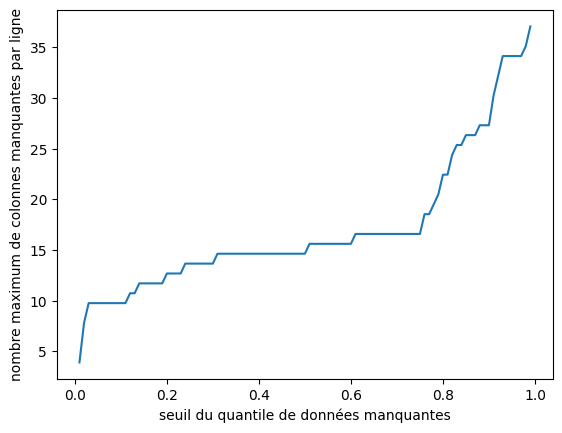

In [45]:
values, quantiles_step = evaluate_row_removal()
pl.plot(quantiles_step, values)
pl.xlabel("seuil du quantile de données manquantes")
pl.ylabel("nombre maximum de colonnes manquantes par ligne")

Ici, nous avons utilisé ce script afin de nous aider à comprendre le % de données manquantes avant et après le nettoyage. Nous avons supprimé 123 lignes. 

Avant le nettoyage, nous avions des lignes avec 0 sur 40 données, et après nettoyage, la ligne avec le moins de données en contenait ~23 sur 40.

In [46]:
cleaned_df = merged_df
original_rows = cleaned_df.shape[0]
missing_values_before = cleaned_df.isnull().mean(axis=1)
max_missing_before = missing_values_before.max()
min_missing_before = missing_values_before.min()

# Calculate the threshold for the top 5% of missing values
threshold = cleaned_df.isnull().mean().quantile(0.75)

# Remove rows with missing values exceeding the threshold
cleaned_df = cleaned_df[cleaned_df.isnull().mean(axis=1) <= threshold]

missing_values_after = cleaned_df.isnull().mean(axis=1)

new_rows=cleaned_df.shape[0]
max_missing_after = missing_values_after.max()
min_missing_after = missing_values_after.min()
print(original_rows)
print(f"Deleted rows: {original_rows-new_rows}")
print(f"Max missing before cleaning: {max_missing_before*40:.2f}")
print(f"Min missing before cleaning: {min_missing_before*40:.2f}")
print(f"Max missing after cleaning: {max_missing_after*40 :.2f}")
print(f"Min missing after cleaning: {min_missing_after*40:.2f}")

307
Deleted rows: 123
Max missing before cleaning: 39.02
Min missing before cleaning: 0.98
Max missing after cleaning: 16.59
Min missing after cleaning: 0.98


In [47]:
cleaned_df
cleaned_df.to_csv("final.csv")